# Digit Classification, CNN version

## Import

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import Normalizer

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping


## Données

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


## Pré-traitement

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [7]:
X_train = X_train.reshape((X_train.shape[0], 28,28,1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28,28,1)).astype('float32')

In [8]:
print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))

X_train: (60000, 28, 28, 1)
X_test:  (10000, 28, 28, 1)


## Modèle

### Modèle 1

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(14*14, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 196)               1229508   
                                                                 
 dense_4 (Dense)             (None, 10)                1970      
                                                      

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100, verbose=1)

Epoch 1/10
600/600 [==============================] - 107s 178ms/step - loss: 0.1352 - accuracy: 0.9584 - val_loss: 0.0472 - val_accuracy: 0.9845
Epoch 2/10
600/600 [==============================] - 110s 183ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0376 - val_accuracy: 0.9868
Epoch 3/10
600/600 [==============================] - 112s 186ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 4/10
600/600 [==============================] - 112s 186ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 5/10
600/600 [==============================] - 111s 184ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0301 - val_accuracy: 0.9913
Epoch 6/10
600/600 [==============================] - 110s 183ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0347 - val_accuracy: 0.9890
Epoch 7/10
600/600 [==============================] - 110s 184ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0267 -

In [16]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.998, Test: 0.991


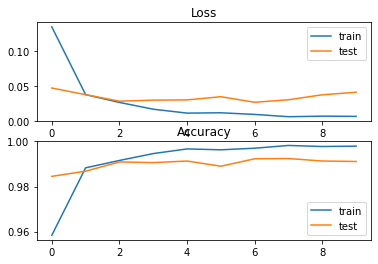

In [17]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [18]:
y_pred = model.predict(X_test, verbose=1)

313/313 [==============================] - 3s 8ms/step


In [20]:
print(metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

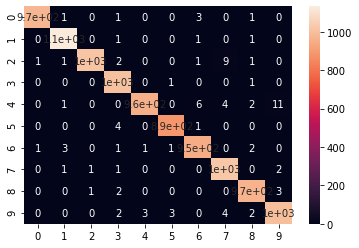

In [21]:
conf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(conf_matrix, annot=True)

### Modèle 2

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(14*14, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_5 (Dense)             (None, 196)               1229508   
                                                                 
 batch_normalization (BatchN  (None, 196)              784       
 ormalization)                                        

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=100, verbose=1, callbacks=[es])

Epoch 1/30
600/600 [==============================] - 106s 176ms/step - loss: 0.1110 - accuracy: 0.9681 - val_loss: 0.0574 - val_accuracy: 0.9807
Epoch 2/30
600/600 [==============================] - 105s 175ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.0327 - val_accuracy: 0.9903
Epoch 3/30
600/600 [==============================] - 106s 177ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0469 - val_accuracy: 0.9848
Epoch 4/30
600/600 [==============================] - 104s 173ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0424 - val_accuracy: 0.9877
Epoch 5/30
600/600 [==============================] - 99s 166ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0293 - val_accuracy: 0.9907
Epoch 6/30
600/600 [==============================] - 99s 165ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 7/30
600/600 [==============================] - 99s 165ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0314 - va

In [26]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.999, Test: 0.991


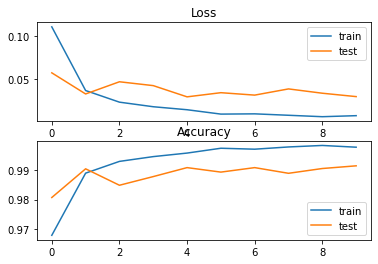

In [27]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [28]:
y_pred = model.predict(X_test, verbose=1)

313/313 [==============================] - 3s 8ms/step


In [29]:
print(metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<AxesSubplot:>

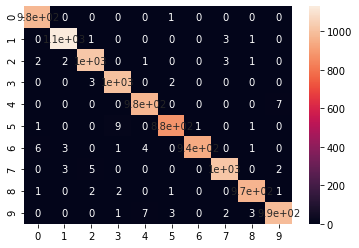

In [30]:
conf_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(conf_matrix, annot=True)